In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from backprop_helper import get_deep_model
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np

In [38]:
model = get_deep_model(layers=20)
model = load_model('deep_model.hdf5')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
D1 (Dense)                   (None, 3)                 9         
_________________________________________________________________
A1 (Activation)              (None, 3)                 0         
_________________________________________________________________
D2 (Dense)                   (None, 2)                 8         
_________________________________________________________________
A2 (Activation)              (None, 2)                 0         
_________________________________________________________________
D3 (Dense)                   (None, 2)                 6         
_________________________________________________________________
A3 (Activation)              (None, 2)                 0         
_________________________________________________________________
D4 (Dense)                   (None, 2)                

In [40]:
def get_grad(model, layer, X = np.array([[3.4, 2.1]]), P_true = np.array([[1, 0, 0]])):

    inputs = tf.constant(X)

    with tf.GradientTape() as tape:
        preds = model(inputs)
        loss = model.loss(tf.constant(P_true), preds)

    grads = tape.gradient(loss, model.get_layer(layer).trainable_variables)
    return grads

In [44]:
grads = []
for i in range(20):
    g = get_grad(model, f'D{i+1}')[0][0].numpy()
    grads.append(np.abs(g).mean())

In [45]:
from matplotlib import pyplot as plt

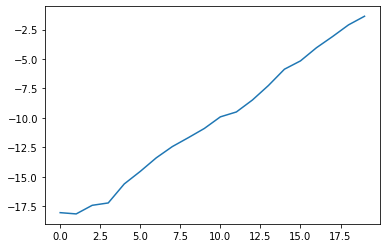

In [50]:
plt.plot(np.log10(grads))

In [51]:
grads[0]

8.844711e-19